<a href="https://colab.research.google.com/github/srujith7/AD-075/blob/main/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

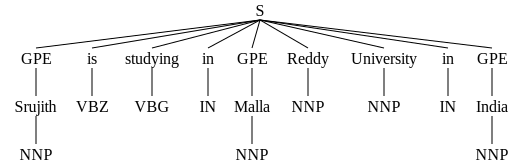

In [30]:
import nltk
from nltk import ne_chunk
from nltk import word_tokenize
ne_chunk(nltk.pos_tag(word_tokenize(sent)), binary = False)

In [31]:
sent = "Srujith is studying in Malla Reddy University in India"

In [32]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [33]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [34]:
import nltk

In [35]:
nltk.download('words')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [36]:
!pip install svgling

In [37]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(u'Apple is ready to launch new phone worth $10000 in New York')
for ent in doc.ents:
  print(ent.text, ent.start_char, ent.end_char, ent.label_)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Apple 0 5 ORG
10000 42 47 MONEY
New York 51 59 GPE


In [38]:
nlp = spacy.load("en_core_web_sm")

In [39]:
text = """
Elon Musk, the CEO of SpaceX and Tesla, announced that SpaceX's Starship was """

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Reviews.csv', nrows = 1000)

df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [42]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [43]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [44]:
from nltk.corpus import stopwords
from textblob import TextBlob
# Instead of 'from textblob import word', use 'from textblob.blob import Word'
from textblob.blob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labelled lumbo halted peanuts....
2,"connection around centuries. light, pillow cit..."
3,looking secret ingredient robitussin believe f...
4,great staff great price. wide assortment mummy...


In [45]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

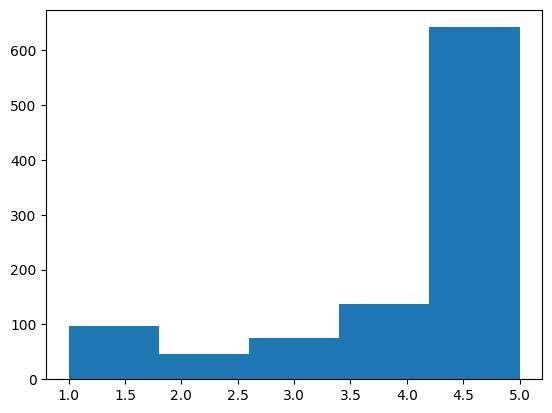

<bound method GroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7e0fcc4ae250>>


In [46]:
reviews=df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').Text.count)

In [47]:
score_1 = reviews[reviews['Score'] == 1].sample(n=47)
score_2 = reviews[reviews['Score'] == 2].sample(n=47)
score_3 = reviews[reviews['Score'] == 3].sample(n=47)
score_4 = reviews[reviews['Score'] == 4].sample(n=47)
score_5 = reviews[reviews['Score'] == 5].sample(n=47)

In [48]:
reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0)
reviews_sample.reset_index(inplace=True, drop=True)
print(reviews_sample.groupby('Score').count().Id)


Score
1    47
2    47
3    47
4    47
5    47
Name: Id, dtype: int64


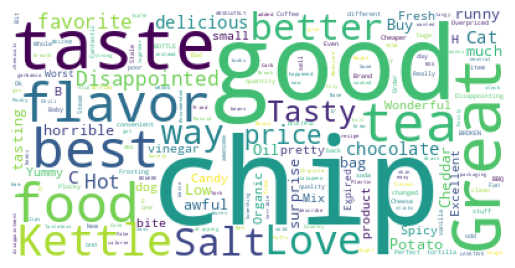

In [49]:
from wordcloud import WordCloud
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())

wordcloud = WordCloud(background_color = 'white').generate(reviews_str)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [58]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]

negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()


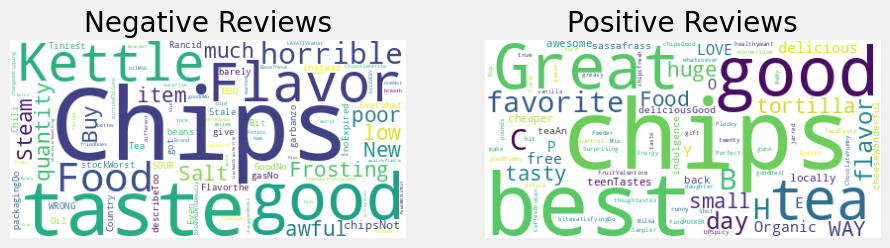

In [60]:
wordcloud_negative = WordCloud(background_color = 'white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color = 'white').generate(positive_reviews_str)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(wordcloud_negative)
ax1.axis('off')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(wordcloud_positive)
ax2.axis('off')
ax1.set_title('Negative Reviews')
ax2.set_title('Positive Reviews')
plt.show()

In [52]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.9 MB/s eta 0:00:00


In [56]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
analyser = SentimentIntensityAnalyzer()
emptyline = []
for row in df['Text']:
  vs = analyser.polarity_scores(row)
  emptyline.append(vs)
  df_sent = pd.DataFrame(emptyline)
df_sent.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.126,0.623,0.250,0.7880
3,0.000,0.868,0.132,0.4404
4,0.000,0.455,0.545,0.9186
